Loading processed DataFrame from 'resume_data.pkl'...
Processed DataFrame loaded successfully.
Extracting embeddings...
Running t-SNE...


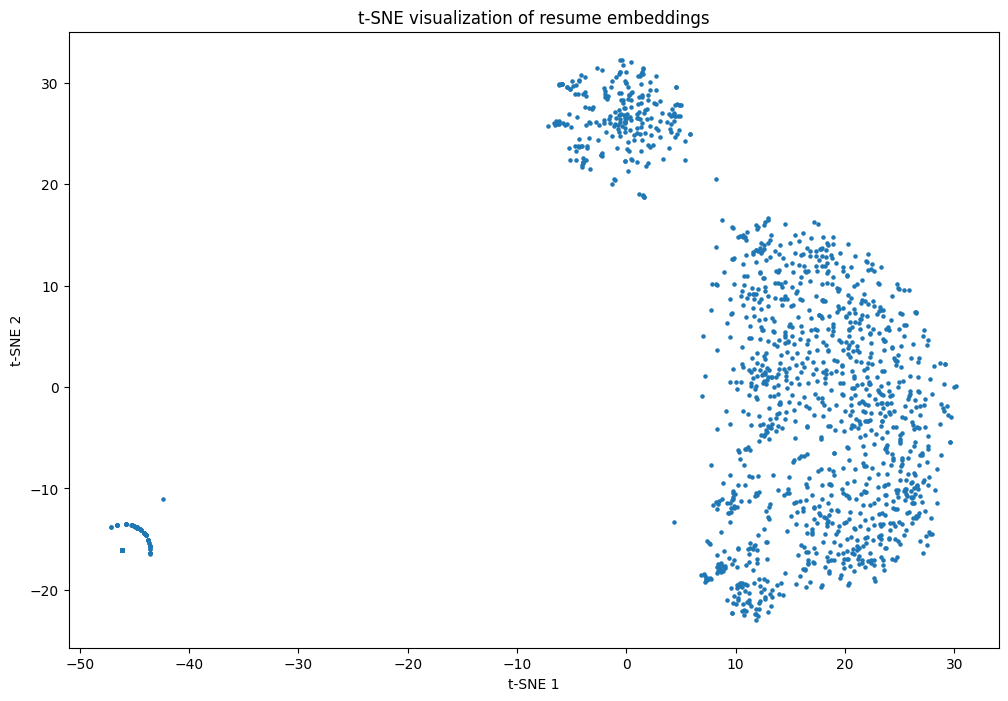

Running UMAP...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


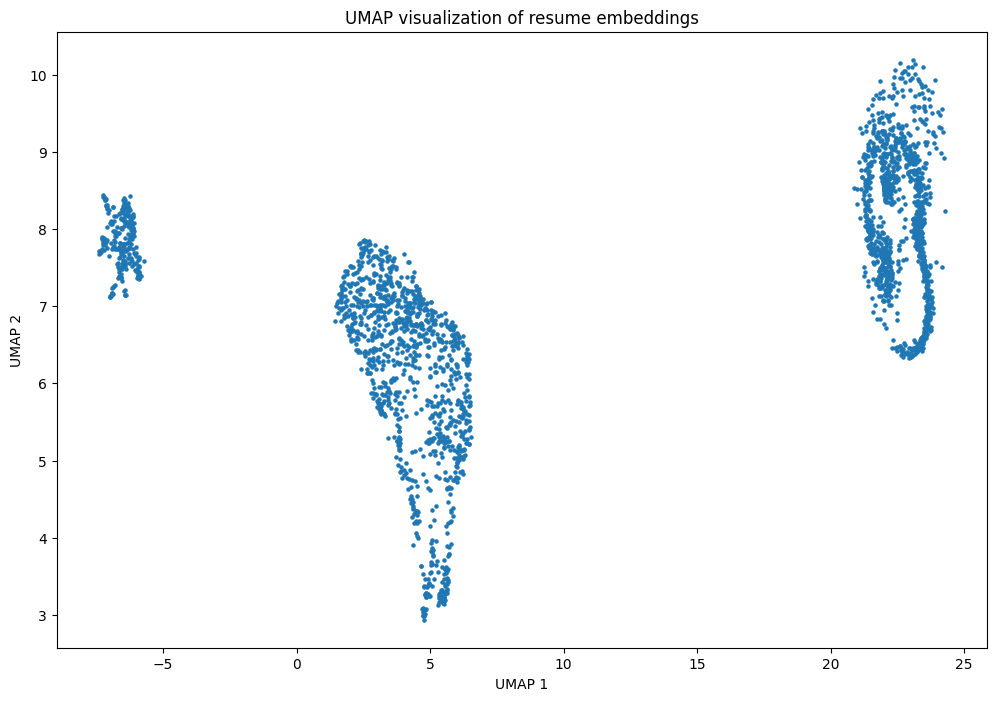

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

# Load the processed DataFrame from the pickle file
pickle_file_path = 'resume_data.pkl'
print(f"Loading processed DataFrame from '{pickle_file_path}'...")
resume_df = pd.read_pickle(pickle_file_path)
print("Processed DataFrame loaded successfully.")

# Extract embeddings
print("Extracting embeddings...")
embeddings = resume_df['embeddings'].apply(lambda x: list(map(float, x.split(','))) if x else [])
embeddings = np.array([e for e in embeddings if e]).astype('float32')

if len(embeddings) == 0:
    print("No embeddings found to visualize.")
else:
    # t-SNE visualization
    print("Running t-SNE...")
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    plt.figure(figsize=(12, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=5)
    plt.title('t-SNE visualization of resume embeddings')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

    # UMAP visualization
    print("Running UMAP...")
    umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    umap_results = umap_reducer.fit_transform(embeddings)

    plt.figure(figsize=(12, 8))
    plt.scatter(umap_results[:, 0], umap_results[:, 1], s=5)
    plt.title('UMAP visualization of resume embeddings')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import plotly.express as px

# Load the processed DataFrame from the pickle file
pickle_file_path = 'resume_data.pkl'
print(f"Loading processed DataFrame from '{pickle_file_path}'...")
resume_df = pd.read_pickle(pickle_file_path)
print("Processed DataFrame loaded successfully.")

# Extract embeddings
print("Extracting embeddings...")
embeddings = resume_df['embeddings'].apply(lambda x: list(map(float, x.split(','))) if x else [])
embeddings = np.array([e for e in embeddings if e]).astype('float32')

if len(embeddings) == 0:
    print("No embeddings found to visualize.")
else:
    # t-SNE 3D visualization
    print("Running t-SNE for 3D visualization...")
    tsne = TSNE(n_components=3, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    fig_tsne = px.scatter_3d(
        x=tsne_results[:, 0], 
        y=tsne_results[:, 1], 
        z=tsne_results[:, 2],
        title='t-SNE 3D visualization of resume embeddings'
    )
    fig_tsne.show()

    # UMAP 3D visualization
    print("Running UMAP for 3D visualization...")
    umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
    umap_results = umap_reducer.fit_transform(embeddings)

    fig_umap = px.scatter_3d(
        x=umap_results[:, 0], 
        y=umap_results[:, 1], 
        z=umap_results[:, 2],
        title='UMAP 3D visualization of resume embeddings'
    )
    fig_umap.show()


Loading processed DataFrame from 'resume_data.pkl'...
Processed DataFrame loaded successfully.
Extracting embeddings...
Running t-SNE for 3D visualization...


Running UMAP for 3D visualization...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import plotly.express as px

# Load the processed DataFrame from the pickle file
pickle_file_path = 'resume_data.pkl'
print(f"Loading processed DataFrame from '{pickle_file_path}'...")
resume_df = pd.read_pickle(pickle_file_path)
print("Processed DataFrame loaded successfully.")

# Extract embeddings
print("Extracting embeddings...")
resume_df['embeddings'] = resume_df['embeddings'].apply(lambda x: list(map(float, x.split(','))) if x else None)

# Filter out rows with missing embeddings
filtered_df = resume_df[resume_df['embeddings'].notnull()].reset_index(drop=True)
embeddings = np.array(filtered_df['embeddings'].tolist()).astype('float32')

if len(embeddings) == 0:
    print("No embeddings found to visualize.")
else:
    # t-SNE 3D visualization with color-coding by Category
    print("Running t-SNE for 3D visualization...")
    tsne = TSNE(n_components=3, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    fig_tsne = px.scatter_3d(
        x=tsne_results[:, 0], 
        y=tsne_results[:, 1], 
        z=tsne_results[:, 2],
        color=filtered_df['Category'],
        title='t-SNE 3D visualization of resume embeddings',
        labels={'color': 'Category'}
    )
    fig_tsne.show()

    # UMAP 3D visualization with color-coding by Category
    print("Running UMAP for 3D visualization...")
    umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
    umap_results = umap_reducer.fit_transform(embeddings)

    fig_umap = px.scatter_3d(
        x=umap_results[:, 0], 
        y=umap_results[:, 1], 
        z=umap_results[:, 2],
        color=filtered_df['Category'],
        title='UMAP 3D visualization of resume embeddings',
        labels={'color': 'Category'}
    )
    fig_umap.show()


Loading processed DataFrame from 'resume_data.pkl'...
Processed DataFrame loaded successfully.
Extracting embeddings...
Running t-SNE for 3D visualization...


Running UMAP for 3D visualization...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import plotly.express as px
from sklearn.metrics import pairwise_distances

# Load the processed DataFrame from the pickle file
pickle_file_path = 'resume_data.pkl'
print(f"Loading processed DataFrame from '{pickle_file_path}'...")
resume_df = pd.read_pickle(pickle_file_path)
print("Processed DataFrame loaded successfully.")

# Extract embeddings
print("Extracting embeddings...")
resume_df['embeddings'] = resume_df['embeddings'].apply(lambda x: list(map(float, x.split(','))) if x else None)

# Filter out rows with missing embeddings
filtered_df = resume_df[resume_df['embeddings'].notnull()].reset_index(drop=True)
embeddings = np.array(filtered_df['embeddings'].tolist()).astype('float32')

if len(embeddings) == 0:
    print("No embeddings found to visualize.")
else:
    # t-SNE 3D visualization with color-coding by Category and IDs as hover data
    print("Running t-SNE for 3D visualization...")
    tsne = TSNE(n_components=3, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    fig_tsne = px.scatter_3d(
        x=tsne_results[:, 0], 
        y=tsne_results[:, 1], 
        z=tsne_results[:, 2],
        color=filtered_df['Category'],
        title='t-SNE 3D visualization of resume embeddings',
        labels={'color': 'Category'},
        hover_data={'ID': filtered_df['ID']}
    )
    fig_tsne.show()

    # UMAP 3D visualization with color-coding by Category and IDs as hover data
    print("Running UMAP for 3D visualization...")
    umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
    umap_results = umap_reducer.fit_transform(embeddings)

    fig_umap = px.scatter_3d(
        x=umap_results[:, 0], 
        y=umap_results[:, 1], 
        z=umap_results[:, 2],
        color=filtered_df['Category'],
        title='UMAP 3D visualization of resume embeddings',
        labels={'color': 'Category'},
        hover_data={'ID': filtered_df['ID']}
    )
    fig_umap.show()

    # Measure average distance between resumes under each category
    print("Calculating average distances within each category...")
    categories = filtered_df['Category'].unique()
    avg_distances = []

    for category in categories:
        cat_embeddings = embeddings[filtered_df['Category'] == category]
        if len(cat_embeddings) > 1:
            dists = pairwise_distances(cat_embeddings)
            avg_distance = np.mean(dists)
        else:
            avg_distance = 0  # If there's only one resume in the category, distance is 0
        avg_distances.append((category, avg_distance))

    # Create a DataFrame for average distances
    avg_distances_df = pd.DataFrame(avg_distances, columns=['Category', 'Average Distance'])

    # Plot average distances
    fig_avg_distances = px.bar(
        avg_distances_df,
        x='Category',
        y='Average Distance',
        title='Average Distance Between Resumes by Category',
        labels={'Average Distance': 'Average Distance', 'Category': 'Category'}
    )
    fig_avg_distances.show()


Loading processed DataFrame from 'resume_data.pkl'...
Processed DataFrame loaded successfully.
Extracting embeddings...
Running t-SNE for 3D visualization...


Running UMAP for 3D visualization...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Calculating average distances within each category...


In [6]:
# Filtered DataFrame with embeddings and categories
print("Filtered DataFrame with embeddings and categories:")
display(filtered_df)

# t-SNE results
print("t-SNE results:")
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2', 't-SNE 3'])
tsne_df['ID'] = filtered_df['ID']
tsne_df['Category'] = filtered_df['Category']
display(tsne_df)

# UMAP results
print("UMAP results:")
umap_df = pd.DataFrame(umap_results, columns=['UMAP 1', 'UMAP 2', 'UMAP 3'])
umap_df['ID'] = filtered_df['ID']
umap_df['Category'] = filtered_df['Category']
display(umap_df)

# Average distances DataFrame
print("Average distances within each category:")
display(avg_distances_df)


Filtered DataFrame with embeddings and categories:


,ID,Resume_str,Resume_html,Category,embeddings
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[-0.3127197027206421, -1.5767347812652588, 0.1..."
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[0.727749764919281, -2.457223892211914, 0.5805..."
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,"[-0.19556130468845367, -1.5377012491226196, -1..."
...,...,...,...,...,...
2478,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2479,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[-0.05542110651731491, -1.5689767599105835, 0...."
2480,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[1.0023670196533203, -0.9121401309967041, 0.50..."
2481,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


t-SNE results:


,t-SNE 1,t-SNE 2,t-SNE 3,ID,Category
0,-10.209921,-3.377264,-1.422953,16852973,HR
1,-11.119901,-1.346652,2.238033,22323967,HR
2,9.685431,2.136087,-5.605589,33176873,HR
3,-3.349724,17.518833,-1.096977,27018550,HR
4,3.555882,-10.321662,5.467084,17812897,HR
...,...,...,...,...,...
2478,-12.684285,-2.449433,-0.039900,99416532,AVIATION
2479,14.521827,-6.881063,-2.269420,24589765,AVIATION
2480,0.809609,18.574598,-3.367704,31605080,AVIATION
2481,-12.684285,-2.449433,-0.039900,21190805,AVIATION


UMAP results:


,UMAP 1,UMAP 2,UMAP 3,ID,Category
0,20.760191,7.911340,1.502685,16852973,HR
1,21.401646,7.825864,2.083656,22323967,HR
2,4.836692,7.801548,9.540293,33176873,HR
3,-5.510755,9.832186,4.275511,27018550,HR
4,1.068148,7.510986,11.140728,17812897,HR
...,...,...,...,...,...
2478,20.854891,8.141505,1.127196,99416532,AVIATION
2479,4.011829,8.953761,11.380894,24589765,AVIATION
2480,-5.408199,9.672921,4.486396,31605080,AVIATION
2481,21.003511,8.035804,1.161891,21190805,AVIATION


Average distances within each category:


,Category,Average Distance
0,HR,11.477777
1,DESIGNER,16.156042
2,INFORMATION-TECHNOLOGY,13.735517
3,TEACHER,14.389987
4,ADVOCATE,12.470108
5,BUSINESS-DEVELOPMENT,13.464125
6,HEALTHCARE,12.435826
7,FITNESS,14.944038
8,AGRICULTURE,13.199943
9,BPO,12.806551
